# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0382 Сергеев Дмитрий и Чегодаева Елизавета. Вариант №14

## Цель работы

$\quad$Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

* *Нерекурсивный фильтр* -- линейный фильтр, характерной особенностью которого является ограниченность по времени его импульсной характеристики (с какого-то момента времени его выходной сигнал становится точно равным нулю).

* *Передаточная функция $H(ω)$* -- оператор, выражающий связь между входным сигналом и выходным.  
Передаточные функции линейного процесса сглаживания показывают для каждого $ω $ соответствующее собственное значение процесса в диапазоне вплоть до частоты Найквиста

* *Метод наименьших квадратов* -- математический подход для оценки параметров моделей:
$$\sum^{m}_{j=1}(y_m-f(x_j))^2 \Rightarrow min$$

* *Формула Эйлера*: $e^{±iϕ} = cos(ϕ)±isin(ϕ)$



## Постановка задачи

$\quad$Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

---

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

7. Сделать выводы.

## Выполнение работы




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1.**  
$\quad$Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию **прямой линией** по 3, 5, 7 и 9 точкам:

> $\quad$Пусть входной сигнал: $s(t)$  
> $\quad$Выходной сигнал: $y(t)=A+Bt$  
> Учтём, что входной и выходной сигнал -- дискретные.  
> Построим приближение (в смысле МНК) прямой линией по пяти точкам:
> $$F(A,B)=\sum^{2}_{k=-2}(s_k-y_k)^2=\sum^{2}_{k=-2}(s_k-A-Bk)^2 \Rightarrow min$$
> Взяв частные производные по $A$ и $B$, получим систему нормальных уравнений:
> $$\begin{cases}5A+0B=\sum^{k=2}_{k=-2}s_k\\0A+10B=\sum^{k=2}_{k=-2}ks_k\end{cases}$$
> В итоге, после решения системы, получаем:
> $$y_0=A=\frac{1}{5}\sum_{k=-2}^{k=2}s_k=\frac{1}{5}(s_{-2}+s_{-1}+s_0+s_1+s_2)$$
> В общем случае:
> $$y_n=\frac{1}{5}\sum_{k=n-2}^{k=n+2}s_k=\frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s_{n+2})$$
> Положим $s_n=e^{i\omega n}$, следовательно:
> $$y_n=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
> Исходя их этого, получим передаточную функцию $H(\omega)$:
> $$H(\omega)=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})$$
> Так как передаточная функция, полученная выше, является геометрической прогрессией со знаменателем $e^{i \omega} => $ представим $H(\omega)$ как сумму геометрической прогресии:
> $$H(\omega)=\frac{e^{i\frac{5\omega}{2}}-e^{-i\frac{5\omega}{2}}}{5(e^{i\frac{\omega}{2}}-e^{-i\frac{\omega}{2}})}$$
> Применив формулу Эйлера, получим:
> $$H(\omega)=\frac{sin(\frac{5\omega}{2})}{5sin(\frac{\omega}{2})}\quad\quad(*)$$
> $H(\omega)=H(2\pi f)=\tilde H(f)$, так как $H(\omega)$ -- периодическая функция с периодом равным $2\pi$.  
> В общем случае, при приближениии по $2m+1$ точкам - формула $(*)$ принимает вид:
> $$H(\omega)=\frac{sin(\frac{(2m+1)\omega}{2})}{(2m+1)sin(\frac{\omega}{2})}$$

In [ ]:
def tildaH_1(f, m):
    w = 2*np.pi*f
    H = (np.sin((2*m + 1)*w / 2)) / ((2*m + 1) * np.sin(w / 2))
    return H

$\quad$Далее были построены графики $\tilde{H}(f)$:

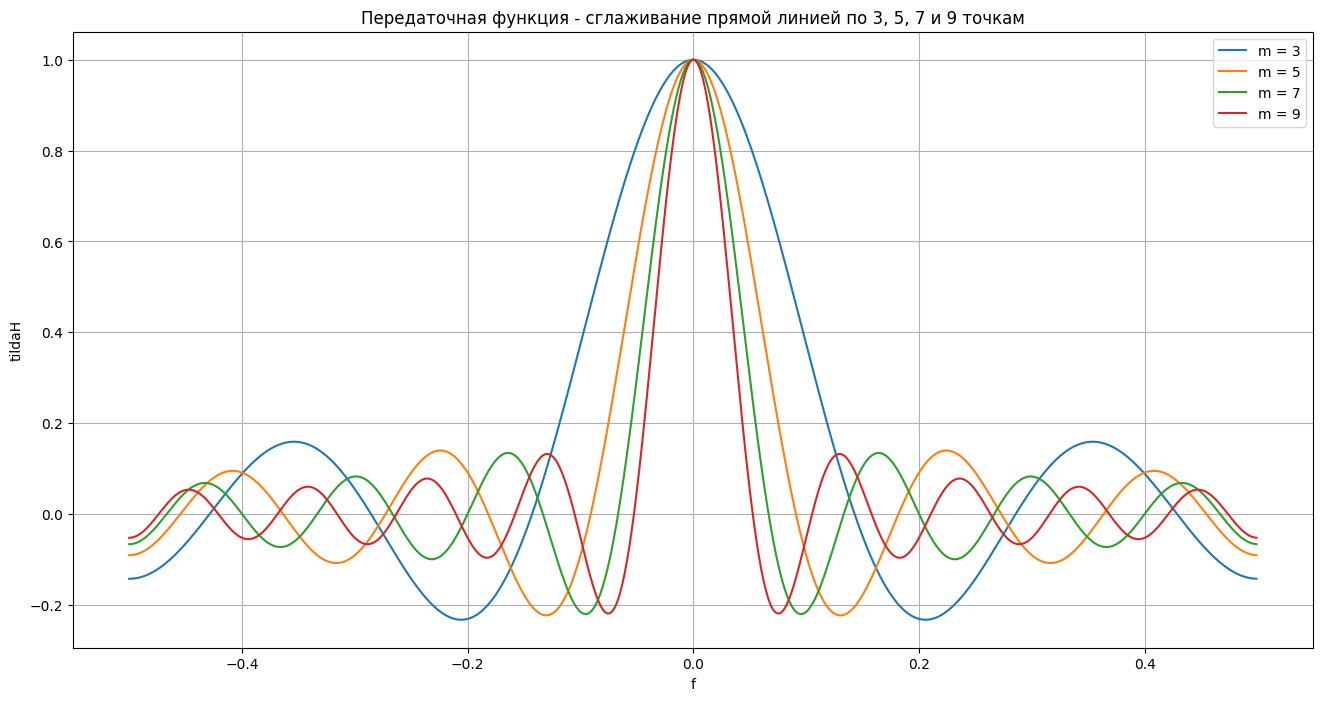

In [ ]:
interval = np.arange(-0.5, 0.5, 0.001)

plt.figure(figsize=(16, 8))

plt.title('Передаточная функция - сглаживание прямой линией по 3, 5, 7 и 9 точкам')
plt.plot(interval, tildaH_1(interval, 3), label='m = 3')
plt.plot(interval, tildaH_1(interval, 5), label='m = 5')
plt.plot(interval, tildaH_1(interval, 7), label='m = 7')
plt.plot(interval, tildaH_1(interval, 9), label='m = 9')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

$\quad$ Интерпритация частотных свойств передаточных функций для различного количества точек:
* Симметрия относительно нуля;
* При движении к краям окна наблюдается учащение колебаний;
* Крутизна спада по мере увеличения числа точек -- увеличивается;
* При увеличении числа точек амлитуда колебаний -- уменьшается;
* В окрестностях нулевой частоты -- входной сигнал не подавляется (полоса пропускания сигнала без искажений очень узкая), но с увеличением частоты происходит подавление гармоник с более высокой частотой.



**2.**

$\quad$Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию **полиномом второй степени** по 7, 9, 11 и 13 точкам.

> $\quad$Выходной сигнал: $y(t)=A+Bt+Ct^2$   
> Построим приближение (в смысле МНК) полиномом второй степени по семи точкам:
> $$F(A,B,C)=\sum^{3}_{k=-3}(s_k-y_k)^2=\sum^{3}_{k=-3}(s_k-A-Bk-Ck^2)^2 \Rightarrow min$$
> Аналогично п.1 - возьмём частные производные по $A$, $B$ и $C$ составим систему нормальных уравнений:
> $$\begin{cases}
7A + 0B + 10C = \sum^{k=3}_{k=-3}s_k \\
0A + 28B + 0C = \sum^{k=3}_{k=-3}ks_k \\
28A + 0B + 196C = \sum^{k=3}_{k=-3}k^2s_k
\end{cases}$$
> В итоге, после решения системы, получаем:
> $$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_{n}+6s_{n+1}+3s_{n+2}-2s_{n+3})$$
> Положим $s_n=e^{i\omega n}$ и применим формулу Эйлера, в результате чего получится:
> $$H(\omega)=\frac{1}{21}[7+12cos(\omega)+6cos(2\omega)-4cos(3\omega)]$$  
> Расчёт передаточных функций для 9, 11 и 13 точек реализуется аналогично выводу выше.  
>* 9 точек:  
>$$y_n = \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_{n}+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$  
>$$H(\omega)=\frac{1}{231}[59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)]$$  
>* 11 точек:  
>$$y_n=\frac{1}{429}(-36s_{n-5}+9s_{n-4}+44s_{n-3}+69s_{n-2}+84s_{n-1}+89s_{n}+84s_{n+1}+69s_{n+2}+44s_{n+3}+9s_{n+4}-36s_{n+5})$$  
>$$H(\omega)=\frac{1}{429}[89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)]$$  
>* 13 точек:  
>$$y_n=\frac{1}{143}(-11s_{n-6}+9s_{n-4}+16s_{n-3}+21s_{n-2}+24s_{n-1}+25s_{n}+24s_{n+1}+21s_{n+2}+16s_{n+3}+9s_{n+4}-11s_{n+6})$$  
>$$H(\omega)=\frac{1}{143}[25+48cos(\omega)+42cos(2\omega)+32cos(3\omega)+18cos(4\omega)-22cos(6\omega)]$$

In [ ]:
def tildaH_2_7(f):
    w = 2*np.pi*f
    H = (1 / 21) * (7 + 12*np.cos(w) + 6*np.cos(2*w) - 4*np.cos(3*w))
    return H

def tildaH_2_9(f):
    w = 2*np.pi*f
    H = (1 / 231) * (59 + 108*np.cos(w) + 78*np.cos(2*w) + 28 * np.cos(3*w) - 42*np.cos(4*w))
    return H

def tildaH_2_11(f):
    w = 2*np.pi*f
    H = (1 / 429) * (89 + 168*np.cos(w) + 138*np.cos(2*w) + 88*np.cos(3*w) + 18*np.cos(4*w) - 72*np.cos(5*w))
    return H

def tildaH_2_13(f):
    w = 2*np.pi*f
    H = (1 / 143) * (25 + 48*np.cos(w) + 42*np.cos(2*w) + 32*np.cos(3*w) + 18*np.cos(4*w) - 22*np.cos(6*w))
    return H

$\quad$Графики $\tilde{H}(f)$:

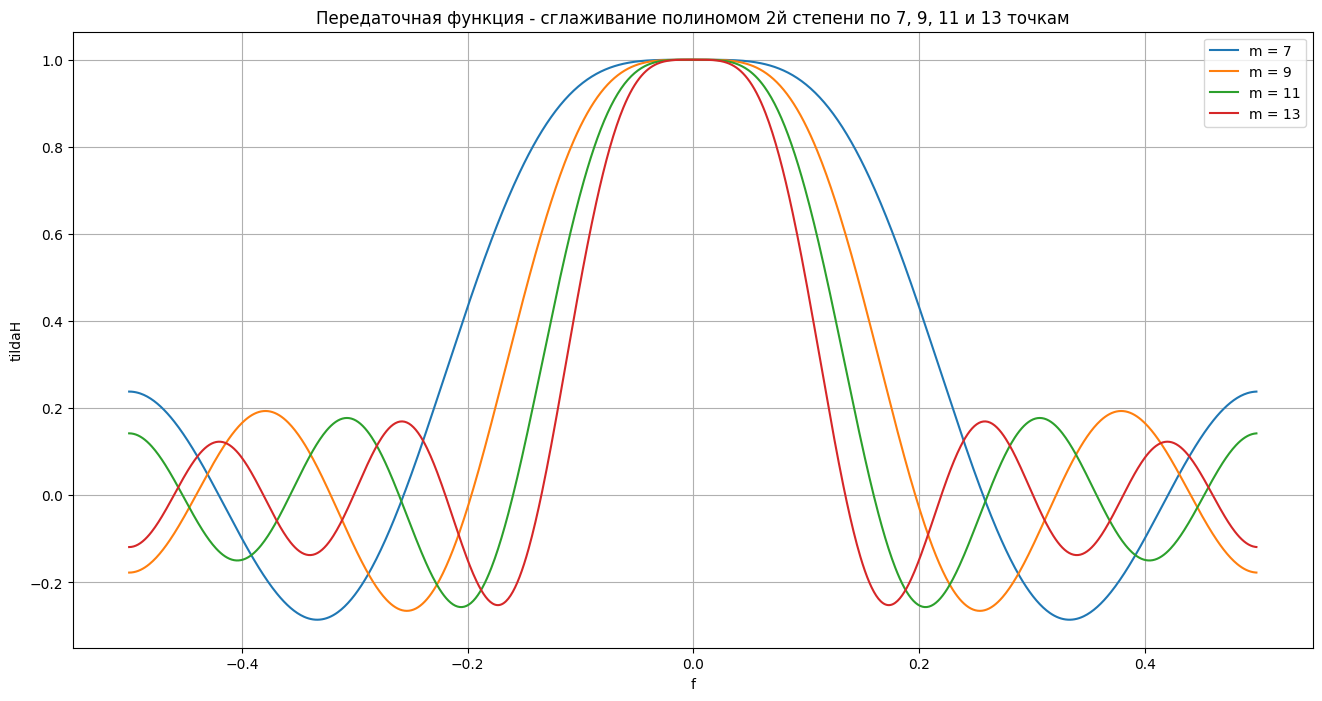

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция - сглаживание полиномом 2й степени по 7, 9, 11 и 13 точкам')
plt.plot(interval, tildaH_2_7(interval), label='m = 7')
plt.plot(interval, tildaH_2_9(interval), label='m = 9')
plt.plot(interval, tildaH_2_11(interval), label='m = 11')
plt.plot(interval, tildaH_2_13(interval), label='m = 13')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

$\quad$ Интерпритация частотных свойств передаточных функций для различного количества точек:
* Симметрия относительно нуля;
* При движении к краям окна наблюдается учащение колебаний;
* Крутизна спада по мере увеличения числа точек -- увеличивается;
* При увеличении числа точек амлитуда колебаний -- уменьшается;
* С увеличением числа точек ширина полосы пропускания сигнала без искажений - уменьшается, также с увеличением частоты происходит подавление гармоник с более высокой частотой.

**3.**

$\quad$Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию **полиномом четвёртой степени** по 9, 11, 13 и 15 точкам:

> $\quad$Выходной сигнал: $y(t)=A+Bt+Ct^2+Dt^3+Et^4$   
> Построим приближение (в смысле МНК) полиномом четвёртой степени по девяти точкам:
> $$F(A,B,C,D,E)=\sum^{7}_{k=-7}(s_k-y_k)^2=\sum^{7}_{k=-7}(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2 \Rightarrow min$$
> Аналогично п.1 - возьмём частные производные по $A$, $B$, $C$, $D$ и $E$ составим систему нормальных уравнений:
> $$\begin{cases}
9A + 0B + 60C + 0D + 708E = \sum^{k=4}_{k=-4}s_k \\
0A + 60B + 0C + 708D + 0E = \sum^{k=4}_{k=-4}ks_k \\
60A + 0B + 708C + 0D + 9780E = \sum^{k=4}_{k=-4}k^2s_k \\
0A + 708B + 0C + 9780D + 0E = \sum^{k=4}_{k=-4}k^3s_k \\
708A + 0B + 9780C + 0D + 144708E = \sum^{k=4}_{k=-4}k^4s_k
\end{cases}$$
> Решив систему - получим:
> $$y_n=\frac{1}{429}(15s_{n-4}-55s_{n-3}+30s_{n-2}+135s_{n-1}+179s_{n}+135s_{n+1}+30s_{n+2}-55s_{n+3}+15s_{n+4})$$  
> Положим $s_n=e^{i\omega n}$ и применим формулу Эйлера:  
> $$H(\omega) = \frac{1}{429}\big[179 + 270cos(\omega) + 60cos(2\omega) - 110cos(3\omega) + 30cos(4\omega)\big]$$   
> Вывод передаточных функций для 11, 13 и 15 точек аналогичен.  
>* 11 точек:  
> $$y_n=\frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_{n}+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$  
> $$H(\omega) = \frac{1}{429}\big[143 + 240cos(\omega) + 120 cos(2\omega) - 20 cos(3\omega) - 90cos(4\omega) + 36cos(5\omega)\big]$$  
>* 13 точек:  
>$$y_n=\frac{1}{2431}(110s_{n-6}-198s_{n-5}-135s_{n-4}+110s_{n-3}+390s_{n-2}+600s_{n-1}+677s_{n}+600s_{n+1}+390s_{n+2}+110s_{n+3}-135s_{n+4}-198s_{n+5}+110s_{n+6})$$   
>$$H(\omega) = \frac{1}{2431}\big[677 + 1200cos(\omega) + 780cos(2\omega) + 220 cos(3\omega) - 270cos(4\omega) - 396cos(5\omega) + 220cos(6\omega)\big]$$  
>* 15 точек:  
>$$y_n=\frac{1}{46189}(2145s_{n-7}-2860s_{n-6}-2937s_{n-5}-165s_{n-4}+3755s_{n-3}+7500s_{n-2}+10125s_{n-1}+11063s_{n}+10125s_{n+1}+7500s_{n+2}+3755s_{n+3}-165s_{n+4}-2937s_{n+5}-2860s_{n+6}+2145s_{n+7})$$  
>$$H(\omega) = \frac{1}{46189}\big[11063 + 20250cos(\omega) + 15000cos(2\omega) + 7510cos(3\omega) - 330cos(4\omega) - 5874cos(5\omega) - 5720cos(6\omega) + 4290cos(7\omega)\big]$$  


In [ ]:
def tildaH_4_9(f):
    w = 2*np.pi*f
    H = (1 / 429) * (179 + 270*np.cos(w) + 60*np.cos(2*w) - 110*np.cos(3*w) + 30*np.cos(4*w))
    return H

def tildaH_4_11(f):
    w = 2*np.pi*f
    H = (1 / 429) * (143 + 240*np.cos(w) + 120*np.cos(2*w) - 20*np.cos(3*w) - 90*np.cos(4*w) + 36*np.cos(5*w))
    return H

def tildaH_4_13(f):
    w = 2*np.pi*f
    H = (1 / 2431) * (677 + 1200*np.cos(w) + 780*np.cos(2*w) + 220*np.cos(3*w) - 270*np.cos(4*w) - 396*np.cos(5*w) + 220*np.cos(6*w))
    return H

def tildaH_4_15(f):
    w = 2*np.pi*f
    H = (1 / 46189) * (11063 + 20250*np.cos(w) + 15000*np.cos(2*w) + 7510*np.cos(3*w) - 330*np.cos(4*w) - 5874*np.cos(5*w) - 5720*np.cos(6*w) + 4290*np.cos(7*w))
    return H

$\quad$Вывод построенных графиков для $\tilde{H}(f)$:





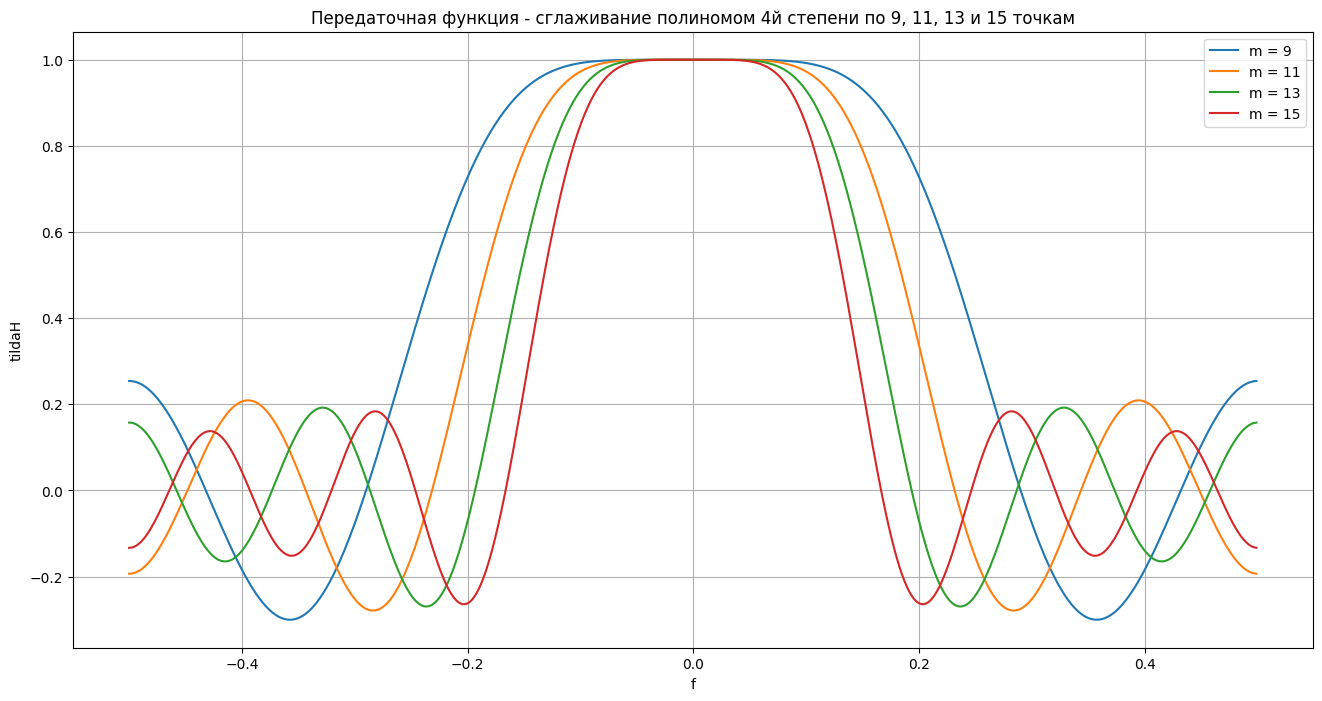

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция - сглаживание полиномом 4й степени по 9, 11, 13 и 15 точкам')
plt.plot(interval, tildaH_4_9(interval), label='m = 9')
plt.plot(interval, tildaH_4_11(interval), label='m = 11')
plt.plot(interval, tildaH_4_13(interval), label='m = 13')
plt.plot(interval, tildaH_4_15(interval), label='m = 15')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

$\quad$ Интерпритация частотных свойств передаточных функций для различного количества точек:  
Аналогично п.1 и п.2, за исключением того, что полоса пропуска сигнала без искажений значительно шире.


**4.**

$\quad$Формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по **формулам Спенсера** по 15 и 21 точкам:

>* 15 точек:  
> $$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+6} - 6s_{n+6} - 3s_{n+7})$$  
> $$⇓$$  
> $$H(\omega)=\frac{1}{320}\big[74 + 134cos(\omega)+92cos(2\omega)+42cos(3\omega)+6cos(4\omega)-10cos(5\omega)-12cos(6\omega)-6cos(7\omega)\big]$$
>               
>* 21 точек:  
> $$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} -s_{n+10})$$  
> $$⇓$$  
> $$H(\omega)=\frac{1}{350}\big[60 + 114cos(\omega)+94cos(2\omega)+66cos(3\omega)+36cos(4\omega)+12cos(5\omega)-4cos(6\omega)-10cos(7\omega)-10cos(8\omega)-6cos(9\omega)-2cos(10\omega)\big]$$  

In [ ]:
def tildaH_S_15(f):
    w = 2*np.pi*f
    H = (1 / 320) * (74 + 134*np.cos(w) + 92*np.cos(2*w) + 42*np.cos(3*w) + 6*np.cos(4*w) - 10*np.cos(5*w) - 12*np.cos(6*w) - 6*np.cos(7*w))
    return H

def tildaH_S_21(f):
    w = 2*np.pi*f
    H = (1 / 350) * (60 + 114*np.cos(w) + 94*np.cos(2*w) + 66*np.cos(3*w) + 36*np.cos(4*w) + 12*np.cos(5*w) - 4*np.cos(6*w) - 10*np.cos(7*w) - 10*np.cos(8*w) - 6*np.cos(9*w) - 2*np.cos(10*w))
    return H

$\quad$Построение графиков $\tilde{H}(f)$:

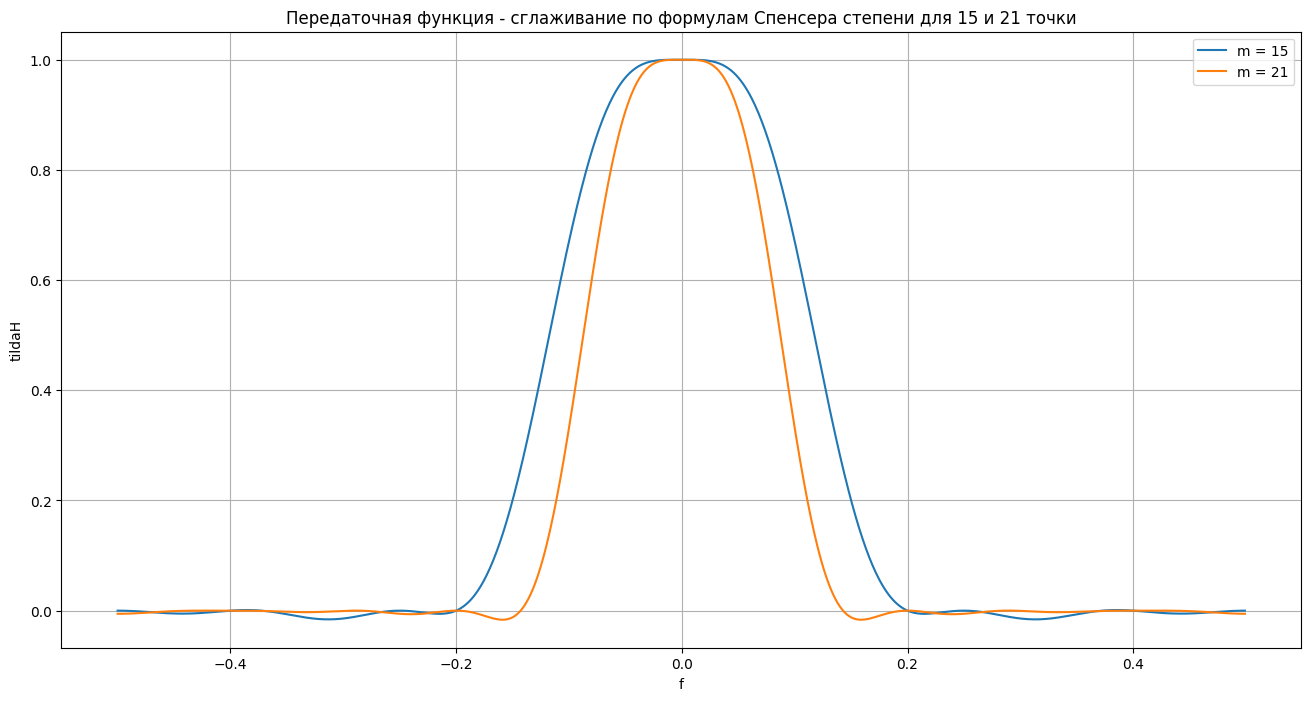

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция - сглаживание по формулам Спенсера степени для 15 и 21 точки')
plt.plot(interval, tildaH_S_15(interval), label='m = 15')
plt.plot(interval, tildaH_S_21(interval), label='m = 21')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

$\quad$ Интерпритация частотных свойств передаточных функций для различного количества точек:
* Симметричность относительно нуля;
* Крутизна спада в районе $f=0$ -- высокая;
* Степень колебаний -- очень мала по сравнению по сравнению с предыдущими полиномиальными приближениями;
* Ширина полосы пропуска сигнала без искажений уменьшается по мере увеличения количества точек.

**5.**

$\quad$Построение графиков из предыдущих пунктов в логарифмической шкале (Дб).

Логарифмичекая шкала: $Дб = 20lg\Big(\frac{|y_n|}{|s_n|}\Big)$

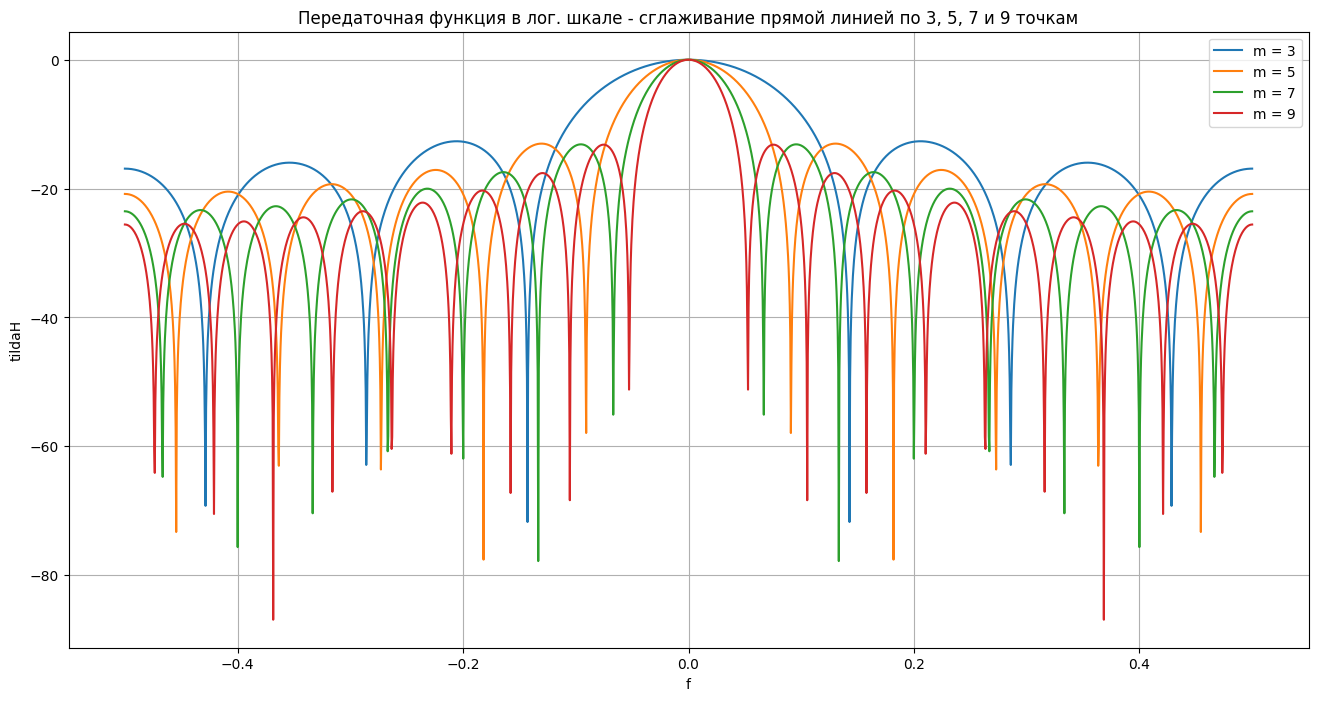

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция в лог. шкале - сглаживание прямой линией по 3, 5, 7 и 9 точкам')
plt.plot(interval, 20*np.log10(np.abs(tildaH_1(interval, 3))), label='m = 3')
plt.plot(interval, 20*np.log10(np.abs(tildaH_1(interval, 5))), label='m = 5')
plt.plot(interval, 20*np.log10(np.abs(tildaH_1(interval, 7))), label='m = 7')
plt.plot(interval, 20*np.log10(np.abs(tildaH_1(interval, 9))), label='m = 9')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

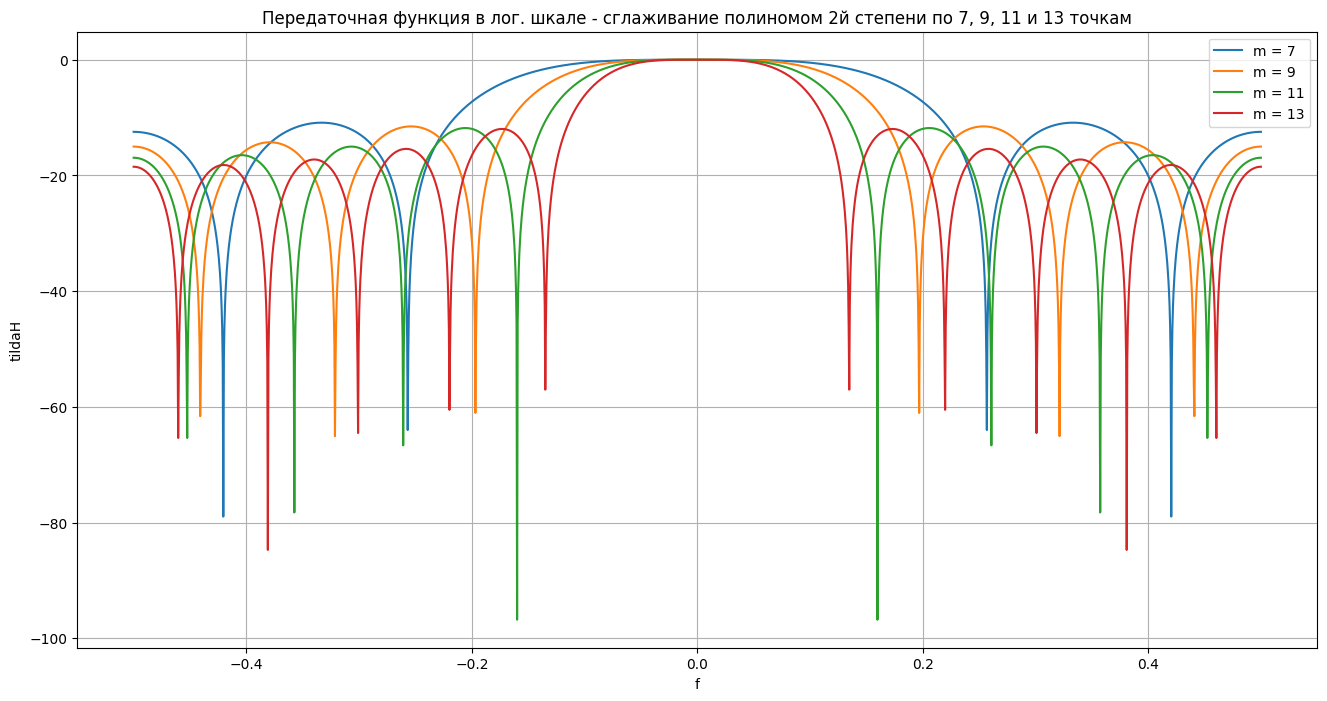

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция в лог. шкале - сглаживание полиномом 2й степени по 7, 9, 11 и 13 точкам')
plt.plot(interval, 20*np.log10(np.abs(tildaH_2_7(interval))), label='m = 7')
plt.plot(interval, 20*np.log10(np.abs(tildaH_2_9(interval))), label='m = 9')
plt.plot(interval, 20*np.log10(np.abs(tildaH_2_11(interval))), label='m = 11')
plt.plot(interval, 20*np.log10(np.abs(tildaH_2_13(interval))), label='m = 13')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

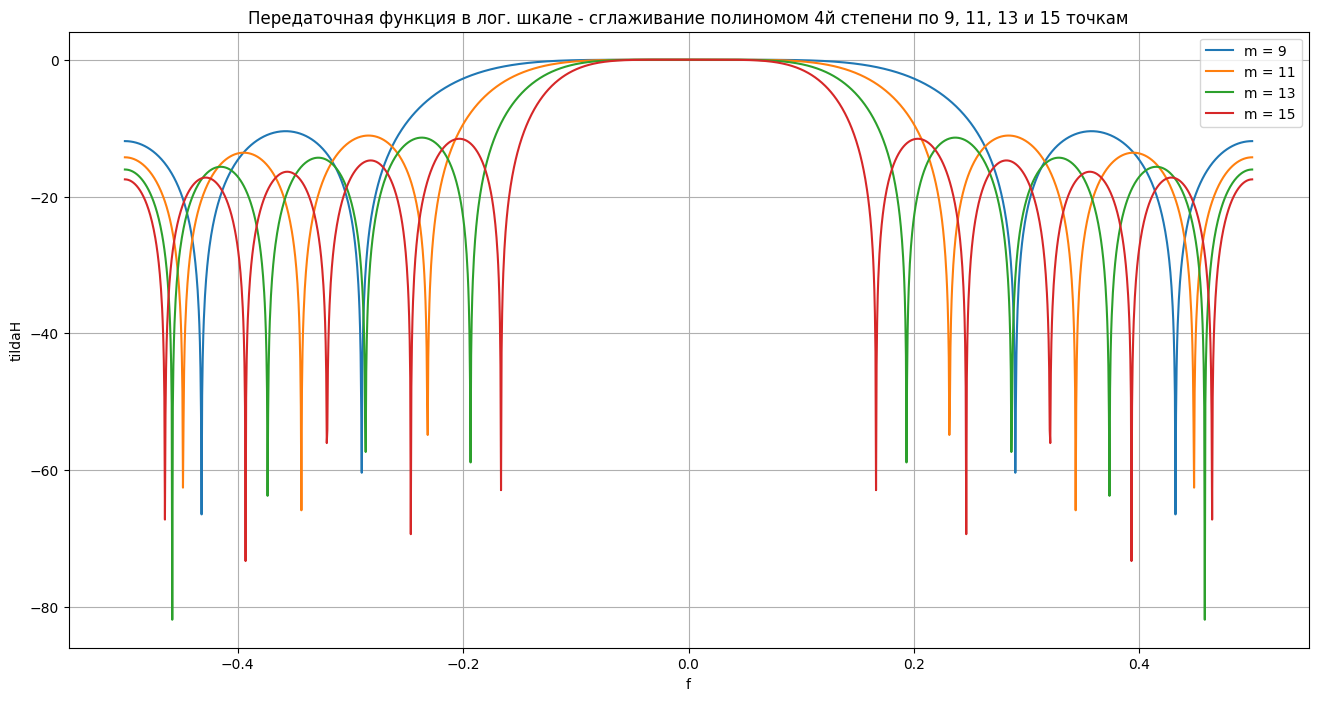

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция в лог. шкале - сглаживание полиномом 4й степени по 9, 11, 13 и 15 точкам')
plt.plot(interval, 20*np.log10(np.abs(tildaH_4_9(interval))), label='m = 9')
plt.plot(interval, 20*np.log10(np.abs(tildaH_4_11(interval))), label='m = 11')
plt.plot(interval, 20*np.log10(np.abs(tildaH_4_13(interval))), label='m = 13')
plt.plot(interval, 20*np.log10(np.abs(tildaH_4_15(interval))), label='m = 15')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

<ipython-input-32-32bfd3803d1c>:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(interval, 20*np.log10(np.abs(tildaH_S_15(interval))), label='m = 15')


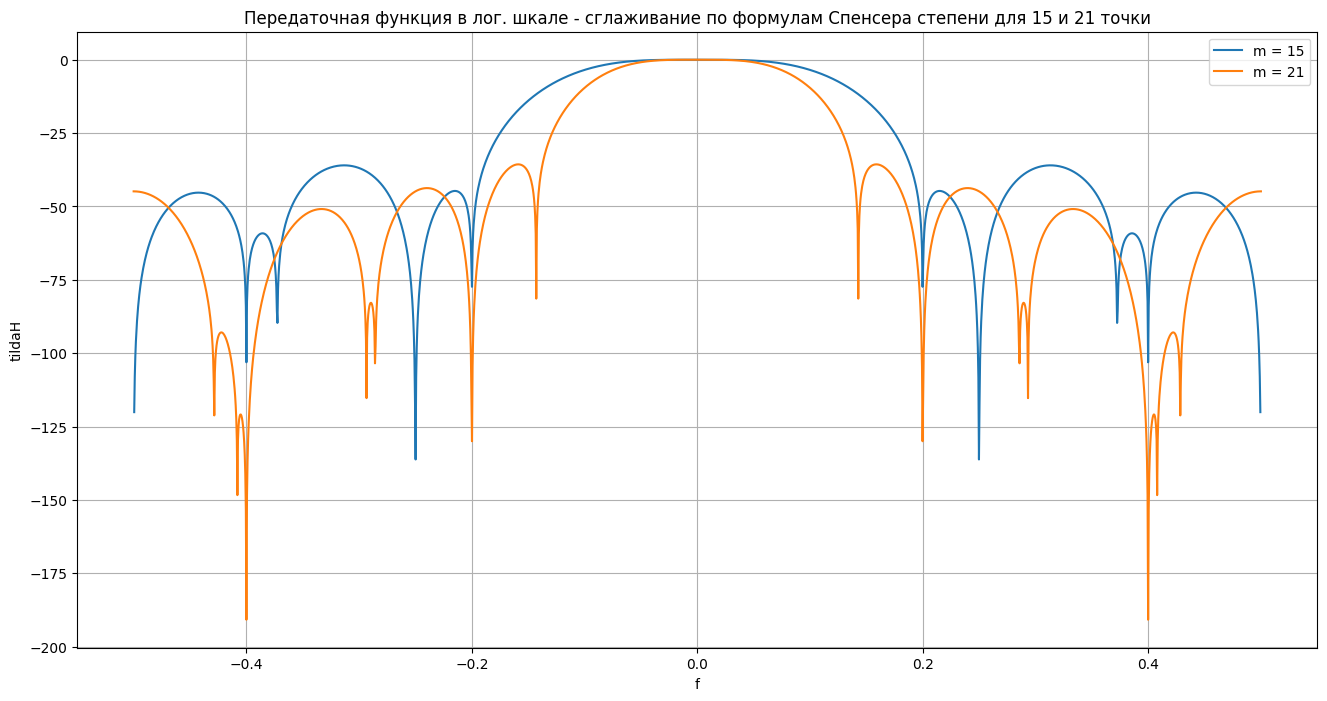

In [ ]:
plt.figure(figsize=(16, 8))

plt.title('Передаточная функция в лог. шкале - сглаживание по формулам Спенсера степени для 15 и 21 точки')
plt.plot(interval, 20*np.log10(np.abs(tildaH_S_15(interval))), label='m = 15')
plt.plot(interval, 20*np.log10(np.abs(tildaH_S_21(interval))), label='m = 21')
plt.xlabel('f')
plt.ylabel('tildaH')
plt.grid(True)

plt.legend()
plt.show()

$\quad$Данные графики отличаются от полученных ранее тем, что позволяют более информативно анализировать сигналы.   
$\quad$Например, на обычном графике для формул Спенсера не видно во сколько раз подавляются те или иные частоты, а на графике в логарифимческой шкале -- наглядно отображено (для других приближений -- аналогично).

**6.**

$\quad$Cопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4:  
* Частотные характеристики передаточных функций из п. 1-4 имеют малое количество отличий, но выделяется ширина полосы пропуска сигнала без искажений (чем выше степень апроксимирующего полинома -- тем полоса шире, в случае формул Спенсера -- ширина полосы схожа с шириной при полиноме второй степени).  
* Также стоит отметить, что использование формул Спенсера позволяет обеспечить пропускание низких частот и заграждение высоких.


## Выводы

$\quad$В ходе выполнения практической работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

$\quad$Были выведены формулы для передаточных функций нерекурсивного фильтра соответствующих: сглаживанию прямой линией по 3, 5, 7 и 9 точкам, сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам, сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам, сглаживанию по формулам Спенсера по 15 и 21 точкам. Согласно формулам были построены графики на интервале $f∈[-0.5,0.5]$. Проинтерпретированы частотные свойства передаточных функций для различного количества точек и проведён сопоставительный анализ этих характеристик для каждого из рассмотренных способов сглаживания.

$\quad$Помимо этого, построенные графики были переведены в логарифмическую шкалу и сопоставлены с выведенными ранее. Так был сделан вывод о смысле рассмотрения передаточных функций в логарифмической шкале.
